In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
import glob
import tqdm
import pandas as pd
file_path = 'spectra_list.pkl'
# Open the pickle file in binary mode
with open(file_path, "rb") as file:
    data = pickle.load(file)

In [3]:
print(data['FLUX'])

0       [2.4276742e-17, 1.0088597e-17, -2.3394539e-17,...
1       [-2.8356863e-17, -1.285211e-17, 8.079854e-18, ...
2       [4.723596e-17, 5.7986684e-17, 7.141742e-17, 3....
3       [1.0083873e-17, 1.8474507e-17, -8.49019e-18, 1...
4       [1.23157945e-17, 9.08865e-18, -3.4359174e-17, ...
                              ...                        
9995    [6.9761774e-18, 1.2433019e-17, -1.1640527e-17,...
9996    [-2.1652081e-18, -1.4805931e-18, 9.806615e-18,...
9997    [2.4469498e-18, 2.809965e-17, 1.6422409e-17, 2...
9998    [1.4835206e-17, -8.264089e-19, -1.8168139e-17,...
9999    [2.753076e-17, 2.877946e-17, -1.8765656e-17, -...
Name: FLUX, Length: 10000, dtype: object


In [4]:
print(len(data['FLUX']))

10000


In [5]:
mean = []
for x in data['FLUX']:
    mean_value = np.mean(x)
    mean.append(mean_value)
print(mean, len(mean))

[2.0255701e-17, 2.452876e-17, 6.374163e-17, 1.5418736e-17, 1.931595e-17, 9.6257445e-18, 9.441454e-18, 2.0952493e-17, 1.6074225e-17, 1.2104888e-17, 2.4712416e-17, 2.9068162e-17, 1.201425e-17, 2.823245e-17, 4.0004082e-17, 2.9124923e-17, 7.6097275e-17, 8.003936e-18, 4.0346482e-17, 4.6215755e-18, 2.9291045e-17, 1.150856e-17, 2.00753e-17, 2.7023377e-17, 9.616587e-18, 1.7327422e-17, 9.3086555e-18, 3.3299936e-17, 1.2862951e-17, 1.8322464e-17, 5.8559023e-18, 3.1286323e-17, 3.752388e-17, 7.4117176e-17, 1.2019102e-17, 1.2201017e-17, 9.042781e-18, 1.5715006e-17, 7.456979e-18, 3.1233136e-17, 8.9587805e-18, 3.5779105e-17, 1.21114354e-17, 2.8230903e-17, 1.3627467e-17, 1.5123191e-17, 6.337889e-17, 4.3215118e-17, 6.0160184e-17, 4.4755328e-17, 2.1805174e-17, 2.711633e-17, 1.8953325e-17, 3.6212058e-17, 1.2744175e-17, 4.4147817e-17, 1.2296596e-17, 2.6872691e-17, 9.289594e-18, 1.82508e-17, 1.2611275e-17, 8.630279e-18, 1.5227862e-17, 8.196437e-18, 1.200747e-17, 1.3145517e-17, 3.1714925e-17, 1.0386778e-17, 

In [6]:
data_pro = data['FLUX']/mean

In [7]:
data_pro

0       [1.198514, 0.49806207, -1.1549608, 3.5710247, ...
1       [-1.1560658, -0.5239608, 0.32940328, 1.3301518...
2       [0.7410535, 0.90971446, 1.1204203, 0.62385046,...
3       [0.65400124, 1.1981856, -0.5506411, 1.0151147,...
4       [0.63759714, 0.47052568, -1.7787981, 1.3250557...
                              ...                        
9995    [0.2258003, 0.40242374, -0.3767729, 1.1734716,...
9996    [-0.27540043, -0.18832184, 1.2473378, -4.04482...
9997    [0.1306603, 1.500443, 0.87691087, 1.516229, 1....
9998    [1.5246828, -0.08493387, -1.8672237, -0.415241...
9999    [3.0908818, 3.2310736, -2.1068225, -3.7227895,...
Name: FLUX, Length: 10000, dtype: object

In [8]:
pwd

'/Users/shangmiao/Machine_Learning'

(1, 23411)


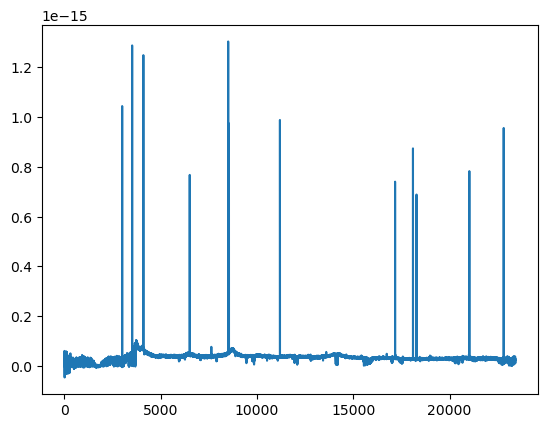

In [9]:
data_single = fits.open('output/l1_data/PAQS_quasar_000001_z2.8_mag18.8_LJ1.fits')
spec = data_single[1].data
print(spec['FLUX'].shape)
plt.plot(spec['FLUX'][0])

In [10]:
df = pd.read_csv('list_templates_10000.csv') 

# Update the "DLA" column based on the condition
df['DLA'] = df['N_DLA'].apply(lambda x: 1 if x > 0 else 0)

# Save the modified DataFrame to a new CSV file
df.to_csv('list_templates_10000_truth.csv', index=False)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
# Load truth value into a pandas DataFrame
truth = pd.read_csv('list_templates_10000_truth.csv') 
DLA = truth['DLA']

In [13]:
unpack_spectra_flux = np.array([x[:] for x in data_pro])
X = unpack_spectra_flux[:,:13600]
y = DLA
print(X.shape,y.shape)
print(X)
print(y[:])

(10000, 13600) (10000,)
[[ 1.198514    0.49806207 -1.1549608  ...  0.7959578   0.849048
   0.86480063]
 [-1.1560658  -0.5239608   0.32940328 ...  1.4047302   1.5375981
   1.5188261 ]
 [ 0.7410535   0.90971446  1.1204203  ...  0.88058716  0.89354336
   0.8478807 ]
 ...
 [ 0.1306603   1.500443    0.87691087 ...  1.089998    1.0591589
   1.1029488 ]
 [ 1.5246828  -0.08493387 -1.8672237  ...  1.2103131   1.2193397
   1.011238  ]
 [ 3.0908818   3.2310736  -2.1068225  ...  1.7989708   1.724783
   1.7235075 ]]
0       0
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: DLA, Length: 10000, dtype: int64


In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[:6000,:], y[:6000], test_size=0.2, random_state=42)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.layers import Dropout

# Build the CNN model
model = Sequential()

model.add(Conv1D(32, 3, activation='relu', input_shape=(13600, 1)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(BatchNormalization(axis=-1, momentum=0.09, epsilon=0.001))
model.add(MaxPooling1D(1))
model.add(Conv1D(64, 5, activation='relu'))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 13598, 32)         128       
                                                                 
 conv1d_1 (Conv1D)           (None, 13596, 64)         6208      
                                                                 
 batch_normalization (BatchN  (None, 13596, 64)        256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 13596, 64)        0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 13592, 64)         20544     
                                                                 
 conv1d_3 (Conv1D)           (None, 13588, 128)        4

In [16]:
from keras.losses import categorical_crossentropy

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])


Epoch 1/10


2023-06-13 15:29:58.905123: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


75/75 [==============================] - 129s 2s/step - loss: 0.5694 - accuracy: 0.7088 - val_loss: 0.5163 - val_accuracy: 0.7433
Epoch 2/10
75/75 [==============================] - 128s 2s/step - loss: 0.5261 - accuracy: 0.7283 - val_loss: 0.5095 - val_accuracy: 0.7383
Epoch 3/10
75/75 [==============================] - 123s 2s/step - loss: 0.5154 - accuracy: 0.7387 - val_loss: 0.4963 - val_accuracy: 0.7425
Epoch 4/10
75/75 [==============================] - 123s 2s/step - loss: 0.5062 - accuracy: 0.7356 - val_loss: 0.4810 - val_accuracy: 0.7450
Epoch 5/10
75/75 [==============================] - 111s 1s/step - loss: 0.5075 - accuracy: 0.7358 - val_loss: 0.5035 - val_accuracy: 0.6450
Epoch 6/10
75/75 [==============================] - 109s 1s/step - loss: 0.4932 - accuracy: 0.7379 - val_loss: 0.4737 - val_accuracy: 0.7392
Epoch 7/10
75/75 [==============================] - 107s 1s/step - loss: 0.4879 - accuracy: 0.7415 - val_loss: 0.4919 - val_accuracy: 0.6642
Epoch 8/10
75/75 [======

In [24]:
import os
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
# Train the model
history=model.fit(X_train , y_train, batch_size = 64, epochs=20, validation_data=(X_test, y_test),callbacks=[cp_callback])

Epoch 1/20
75/75 [==============================] - ETA: 0s - loss: 0.4065 - accuracy: 0.8027
Epoch 1: saving model to training_1/cp.ckpt
75/75 [==============================] - 109s 1s/step - loss: 0.4065 - accuracy: 0.8027 - val_loss: 0.3899 - val_accuracy: 0.8067
Epoch 2/20
75/75 [==============================] - ETA: 0s - loss: 0.3992 - accuracy: 0.8083
Epoch 2: saving model to training_1/cp.ckpt
75/75 [==============================] - 108s 1s/step - loss: 0.3992 - accuracy: 0.8083 - val_loss: 0.4148 - val_accuracy: 0.7783
Epoch 3/20
75/75 [==============================] - ETA: 0s - loss: 0.4057 - accuracy: 0.8006
Epoch 3: saving model to training_1/cp.ckpt
75/75 [==============================] - 111s 1s/step - loss: 0.4057 - accuracy: 0.8006 - val_loss: 0.4346 - val_accuracy: 0.7650
Epoch 4/20
75/75 [==============================] - ETA: 0s - loss: 0.3976 - accuracy: 0.8115
Epoch 4: saving model to training_1/cp.ckpt
75/75 [==============================] - 113s 2s/step - lo

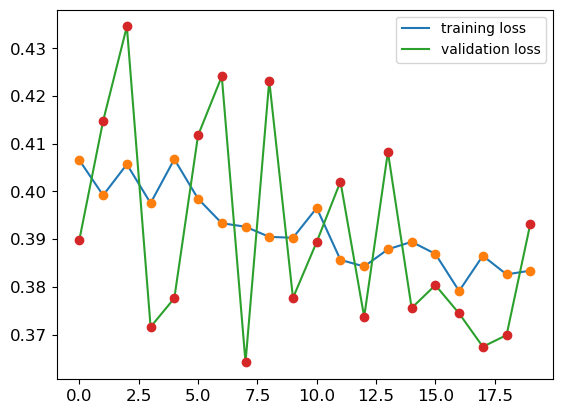

In [25]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

fig =  plt.figure()
plt.plot(training_loss,label = 'training loss')
plt.plot(training_loss,'o')
plt.plot(validation_loss, label = 'validation loss')
plt.plot(validation_loss, 'o')
plt.legend()
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

In [26]:
# Now make predictions on input_valid. Notice we're not giving it any truth values!
predictions = model.predict(X_test)

38/38 [==============================] - 7s 188ms/step


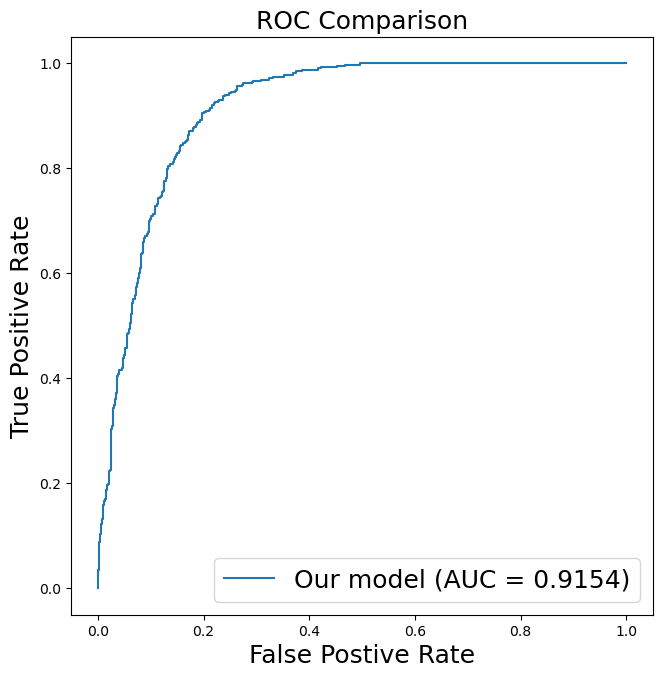

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, _ = roc_curve(y_test, predictions)      # False Positive Rate and True Positive Rate for our model

# We can now calculate the AUC scores of these ROC-curves:
auc_score = auc(fpr,tpr)                         # this is auc score for our model

# Plot the results:
fig = plt.figure(figsize = [7.5,7.5])
plt.title('ROC Comparison', size = 18)
plt.xlabel('False Postive Rate', size = 18)
plt.ylabel('True Positive Rate', size = 18)
plt.plot(fpr,        tpr,        label = f'Our model (AUC = {auc_score:6.4f})')
plt.legend(loc='lower right', fontsize=18)
plt.show()
